In [1]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import sys, os, glob, pickle, struct

In [2]:
def load_halos_pickle(pickle_path):
    
    '''
    Returns pickle as dictionary
    '''
        
    data = pickle.load( open( pickle_path , "rb" ))
    
    output = dict([(str(k),np.zeros(len(data))) for k in data[0]])
    
    for i in range(len(data)):
        gal_dict = data[i]
        
        if gal_dict is not None:
            for key, value in output.items():
                try:
                    value[i] = gal_dict[str(key)]
                except:
                    pass
    return output


In [3]:
def dark_halo_ids(halo_dicts):
    dark_halos = np.full(len(halo_dicts), False)
    for idx, halo in enumerate(halo_dicts):
        if halo['nstar'] == 0:
            dark_halos[idx]=True
    return dark_halos

In [4]:
def plot_mf(a, array, n_bin, zred,vol=60.0,):
    
    hist, bin_edges = np.histogram(np.log10(array),bins=n_bin)

    binmps = np.zeros(len(hist))
    binsize = np.zeros(len(hist))

    for i in np.arange(len(hist)):
        binmps[i] = np.mean([bin_edges[i],bin_edges[i+1]])
        binsize[i] = bin_edges[i+1] - bin_edges[i]
        
    a.set_ylim(10**-6,1)
    
    freq = 10**(-5)
    
    index = np.where(hist >= freq)
    
    a.plot(binmps[index], hist[index]/(vol**3)/binsize[index],label=str(zred),alpha=0.8)
    #a.bar(binmps[index], hist[index]/(vol**3)/binsize[index],alpha = 0.2)

In [6]:
data_dir = "/scratch/hc2347/pickles/60/main_preload_z"

pickle_files = glob.glob(data_dir+"*.p")

pickle_files.sort()

#entries = [pickle.load(open(pickle_file, 'rb')) for pickle_file in pickle_files]

In [7]:
# Plot Baryonic Fraction for central halos

simdict = load_halos_pickle(pickle_files[0])

simdict.keys()

dict_keys(['sfr_100', 'nstar', 'mgascool', 'ngas', 'mvir', 'ndm', 'z_gas', 'mdm', 'mstar', 'mgas', 'npart', 'z_star', 'sfr_10'])

In [8]:
def do_filter(a, b):
    
    def is_valid(elm):
        return elm >0 and np.isfinite(elm)

    #print(len(b))
    for idx in range(len(b) - 1, -1, -1):
        #print(idx)
        if not is_valid(b[idx]):
                a = np.delete(a,idx)
                b = np.delete(b,idx)
    return a,b

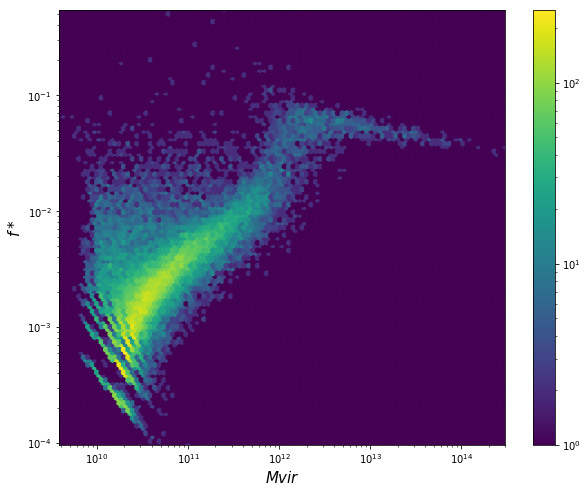

In [10]:
fstar = simdict['mstar']/simdict['mvir']
fgas = simdict['mgas']/simdict['mvir']
f_total = (simdict['mstar'] + simdict['mgas'])/simdict['mvir']
mvir = simdict['mvir']

x, y = do_filter(mvir, fstar)
#x, y = do_filter(mvir, f_total)

mass_filt = np.where(mvir > 10^10)

xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

plt.figure(figsize=(10,8))
hb = plt.hexbin(x,y, gridsize = 100, bins='log',xscale='log', yscale='log')
plt.colorbar(hb)
plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))

plt.ylabel('$f*$',fontsize=15)
plt.xlabel('$Mvir$',fontsize=15)

plt.savefig('/scratch/hc2347/reports/stellar_fractionBIG.png')

#plt.hexbin(x2, y2)

#plt.legend()
# plt.yscale('log')
#plt.xscale('log')

In [84]:
zred = []
for i, pikle in enumerate(pickle_files):
    z = pikle.split("z")[1].split(".p")[0]
    print(z)
    zred.append(z)


0.205
0.946
2.994
3.990
4.973
5.966
9.894


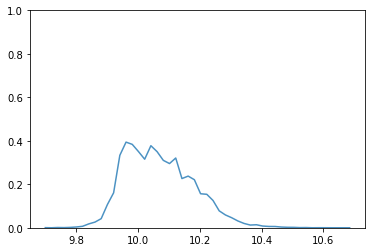

In [15]:
dmh = np.array(entries[0])[dm_filt]

mdm = [halo['mdm'] for halo in dmh]

fig, axs = plt.subplots()

plot_mf(axs, mdm, 50, zred = 0)

10.731352380438883
10.599159110935817
10.498651365346511
10.430780592375918
10.335344352109177
10.243100721194057
10.053869986147213


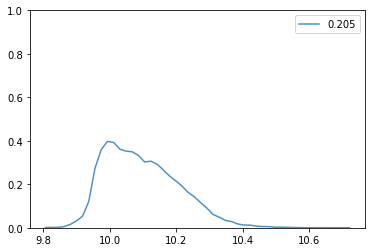

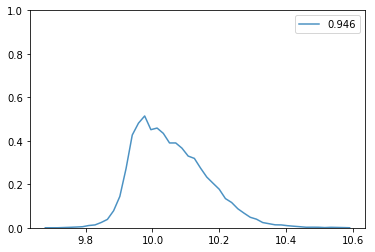

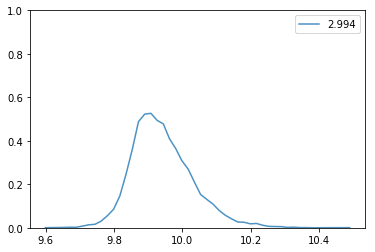

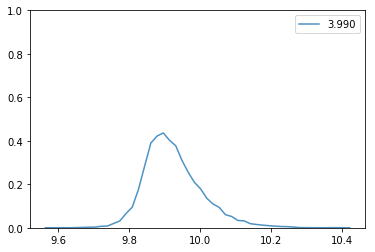

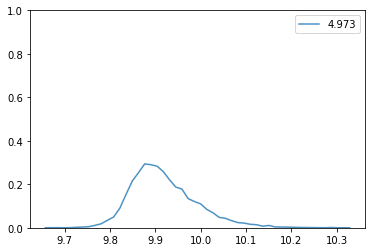

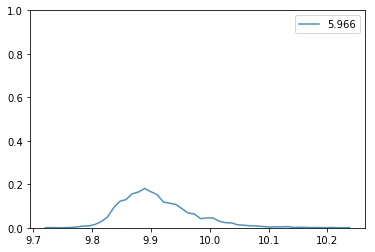

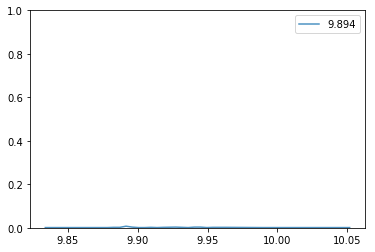

In [77]:

for idx, entry in enumerate(entries):
    dm_filt = dark_halo_ids(entry)
    mdm = [halo['mvir'] for halo in np.array(entry)[dm_filt]]
    print(max(np.log10(mdm)))
    fig, axs = plt.subplots()
    plot_mf(axs, mdm, 50, zred[idx])
    axs.legend()
    
plt.legend()

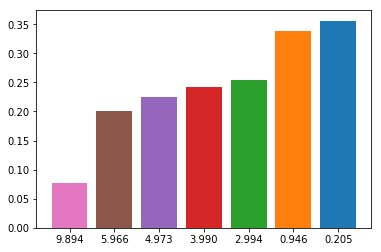

In [29]:
fig, ax = plt.subplots()
for idx, entry in enumerate(entries):
    dm_filt = dark_halo_ids(entry)
    
    percentage = len(np.array(entry)[dm_filt])/len(entry)
    
    ax.bar(zred[idx], percentage)
    ax.invert_xaxis()

22686
22686
26663
26663
22537
22537
16192
16192
9794
9794
4848
4848
46
46


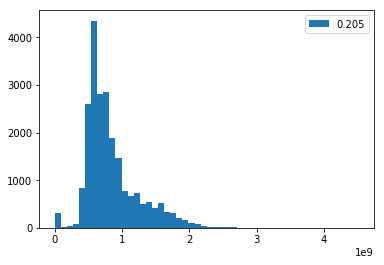

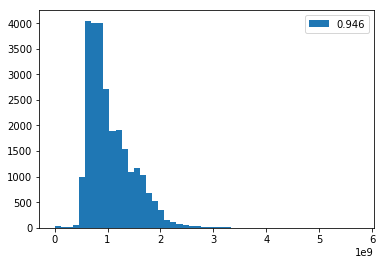

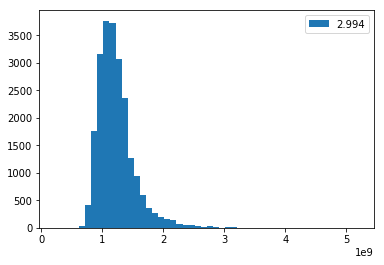

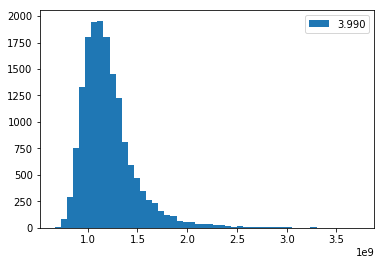

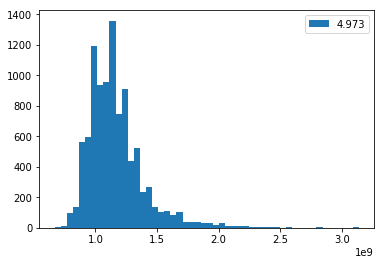

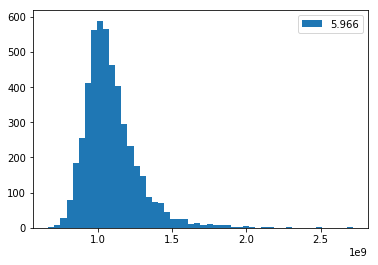

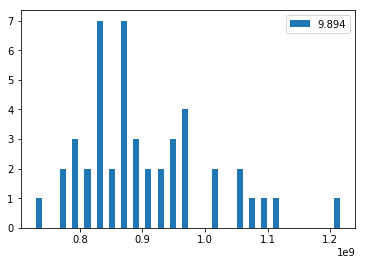

In [74]:
for idx, entry in enumerate(entries):
    dm_filt = dark_halo_ids(entry)
    #fig, ax = plt.subplots()
    
    mgas = [halo['mgas'] for halo in np.array(entry)[dm_filt]]
    print(len(mgas))
    print(len(np.array(entry)[dm_filt]))
    
    plt.figure()
    plt.hist(mgas,50,label=zred[idx])
    plt.legend()